# Problem Statment
1. The task is to build a model that can detect malicious attacks, which are harmful activities carried out by cybercriminals on computer systems or networks.
2. The model is expected to be a deep learning model, which is a type of machine learning algorithm that uses multiple layers to extract and transform features from the input data.
3. The model should be able to process a dataset consisting of features related to cybersecurity, which may need to be preprocessed or transformed before being used as input for the model.
4. The performance of the model will be evaluated based on its ability to accurately detect malicious attacks, using appropriate evaluation metrics and a testing dataset.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview

In [2]:
raw_data = pd.read_csv('./Combined_Dataset_UGR16_.csv')

In [34]:
raw_data.shape

(80000, 13)

## Dataset description
    
__The dataset consists of features related to network traffic, user behavior, and system configurations. The dataset includes approximately 80,000 records with 13 features, and the labels are classified into differnet attack names. The dataset needs to be preprocessed before being used in model building.__

In [3]:
raw_data.head()

,timestamp,duration_of_flow,source_IP,destination_IP,source_port,destination_port,protocol,flags,forwarding_status,type_of_Service,packets_exchanged,bytes,attack
0,01-08-2016 09:00,0.233,31.192.109.167,42.219.152.18,80.0,1533,TCP,.AP.SF,0,0,5.0,420.0,nerisbotnet
1,01-08-2016 09:00,0.233,42.219.152.18,31.192.109.167,1533.0,80,TCP,.AP.SF,0,0,10.0,910.0,nerisbotnet
2,01-08-2016 09:01,45.365,42.219.152.18,173.192.170.88,1567.0,80,TCP,.AP.S.,0,0,18.0,2642.0,nerisbotnet
3,01-08-2016 09:01,45.365,173.192.170.88,42.219.152.18,80.0,1567,TCP,.A.RS.,0,0,4.0,190.0,nerisbotnet
4,01-08-2016 09:01,0.291,61.177.120.254,42.219.152.18,6667.0,1586,TCP,.A..S.,0,0,1.0,48.0,nerisbotnet


In [4]:
raw_data.tail()

,timestamp,duration_of_flow,source_IP,destination_IP,source_port,destination_port,protocol,flags,forwarding_status,type_of_Service,packets_exchanged,bytes,attack
79995,10-04-2016 12:09,1.004,42.219.156.231,71.63.216.94,55529.0,22,TCP,....S.,0,0,2.0,120.0,anomaly-sshscan
79996,10-04-2016 12:09,1.004,42.219.156.231,71.63.216.95,57398.0,22,TCP,....S.,0,0,2.0,120.0,anomaly-sshscan
79997,10-04-2016 12:09,1.004,42.219.156.231,71.63.216.87,56450.0,22,TCP,....S.,0,0,2.0,120.0,anomaly-sshscan
79998,10-04-2016 12:09,1.004,42.219.156.231,71.63.216.86,39691.0,22,TCP,....S.,0,0,2.0,120.0,anomaly-sshscan
79999,10-04-2016 12:09,1.004,42.219.156.231,71.63.216.85,57564.0,22,TCP,....S.,0,0,2.0,120.0,anomaly-sshscan


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          80000 non-null  object 
 1   duration_of_flow   80000 non-null  float64
 2   source_IP          80000 non-null  object 
 3   destination_IP     80000 non-null  object 
 4   source_port        80000 non-null  float64
 5   destination_port   80000 non-null  int64  
 6   protocol           80000 non-null  object 
 7   flags              80000 non-null  object 
 8   forwarding_status  80000 non-null  int64  
 9   type_of_Service    80000 non-null  int64  
 10  packets_exchanged  80000 non-null  float64
 11  bytes              80000 non-null  float64
 12  attack             80000 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 7.9+ MB


- The dataset contains 80000 rows and 13 features.
- There are some unwanted columns not related to our model such as timestamp.

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_of_flow,80000.0,3.579371,46.046947,0.0,0.0,0.0,1.0,2691.891
source_port,80000.0,23474.230126,22426.331993,0.0,3641.0,9230.5,44429.0,65525.000
destination_port,80000.0,10628.266575,17821.183517,0.0,80.0,1972.0,6667.0,65500.000
forwarding_status,80000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000
type_of_Service,80000.0,16.185675,26.265683,0.0,0.0,0.0,40.0,200.000
packets_exchanged,80000.0,4.205179,30.176340,1.0,1.0,2.0,5.0,4925.000
bytes,80000.0,1179.865304,38200.622464,40.0,44.0,200.0,434.0,7379188.000


# Data Preperation

In [7]:
data = raw_data.copy()

In [8]:
import struct, socket

def ip_to_int(ip_address):
    return struct.unpack("!I", socket.inet_aton(ip_address))[0]

data["source_IP_int"] = data["source_IP"].apply(ip_to_int)

data['destination_IP_int'] = data['destination_IP'].apply(ip_to_int)

- This code defines a function ip_to_int that takes an IP address string as input and returns its integer representation using the struct and socket modules in Python. The apply method is used to apply this function to each element of the "source_IP" and "destination_IP" columns in the "data" dataframe, and store the results in new columns "source_IP_int" and "destination_IP_int", respectively.

In [9]:
data.drop(columns=['timestamp', 'forwarding_status', 'source_IP', 'destination_IP'], inplace=True)

# Exploratory Data Analysis

## Finding Missing Values

In [10]:
data.isnull().sum()

duration_of_flow      0
source_port           0
destination_port      0
protocol              0
flags                 0
type_of_Service       0
packets_exchanged     0
bytes                 0
attack                0
source_IP_int         0
destination_IP_int    0
dtype: int64

- There are no missing values present in this dataset.

## Finding Duplicate Values

In [11]:
data.duplicated().sum()

74

- There are 74 duplicated values present in this dataset.

## Univariate Analysis

In [12]:
objcols = data.select_dtypes(exclude=np.number).columns
contcols = data.select_dtypes(include='float64').columns
discols = data.select_dtypes(include='int64').columns

This code separates the column names of a Pandas dataframe "data" into three groups based on their data types for the purpose of univariate analysis and plotting:

    objcols: the column names of non-numeric data types (such as object, string, or categorical data).
    contcols: the column names of numeric data types with decimal points (float64).
    discols: the column names of numeric data types without decimal points (int64).

These groups can be used to analyze and visualize the distributions and relationships of different types of variables separately.

### Distribution of Feature Categorical Columns

In [13]:
for col in objcols:
    print(data[col].value_counts())
    print('\n')

TCP     67546
UDP     12414
ICMP       40
Name: protocol, dtype: int64


....S.    36770
.AP.SF    14781
.A....    10396
...RS.     9585
......     2220
.AP.S.     1169
.APRS.     1031
.A.RS.      847
.A.R..      839
...R..      565
.A..S.      443
.A...F      409
.APR..      274
.A..SF      239
.APRSF      186
.AP...      100
.AP..F       90
.A.R.F       26
.A.RSF       21
.APR.F        9
Name: flags, dtype: int64


nerisbotnet        10000
dos                10000
blacklist          10000
scan44             10000
scan11             10000
anomaly-udpscan    10000
anomaly-spam       10000
anomaly-sshscan    10000
Name: attack, dtype: int64




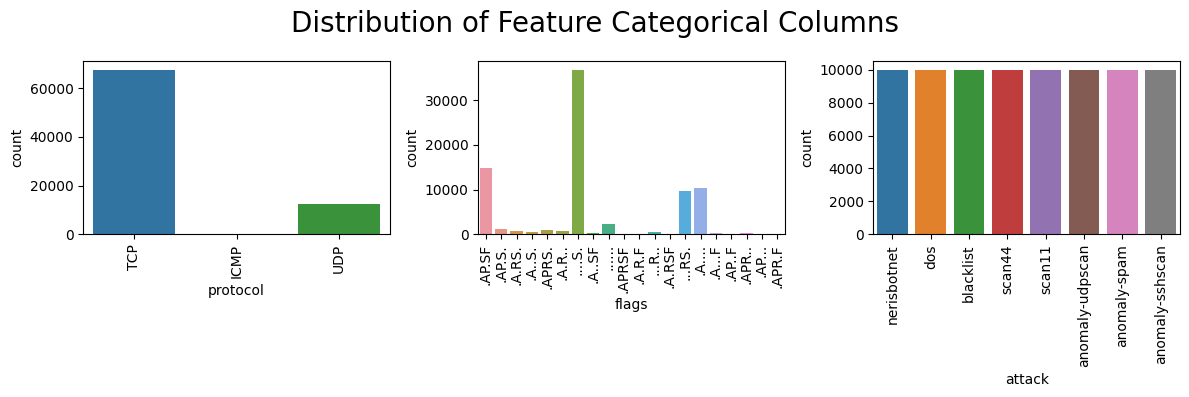

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))
axes = axes.flat

for index,column in enumerate(objcols):
    sns.countplot(
        data=data, 
        x=column, 
        ax=axes[index]
)
    axes[index].tick_params(axis='x', rotation=90)

plt.suptitle('Distribution of Feature Categorical Columns', size=20)
plt.tight_layout()
plt.show()

### Distribution of Features Continuos Numerical Columns

/Users/swag/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/swag/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/swag/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

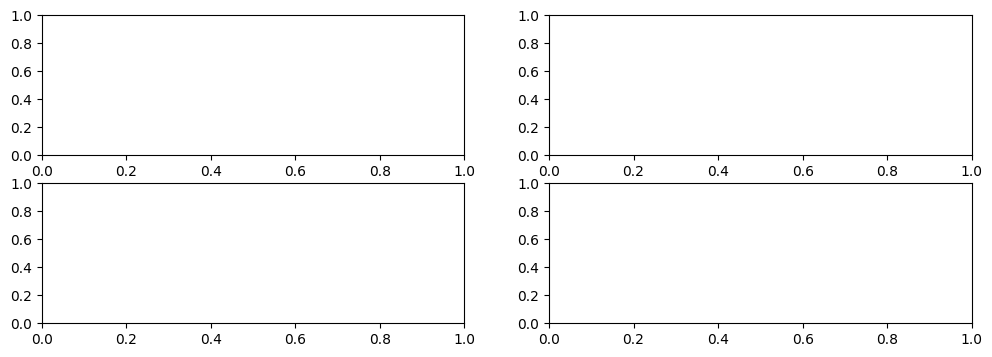

Error in callback <function flush_figures at 0x154b21990> (for post_execute):


KeyboardInterrupt: 

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 4))
axes = axes.flat

for index, column in enumerate(contcols):
     sns.histplot(
         data=data, 
         x=column, 
         ax=axes[index]
     )

### Finding Outliers

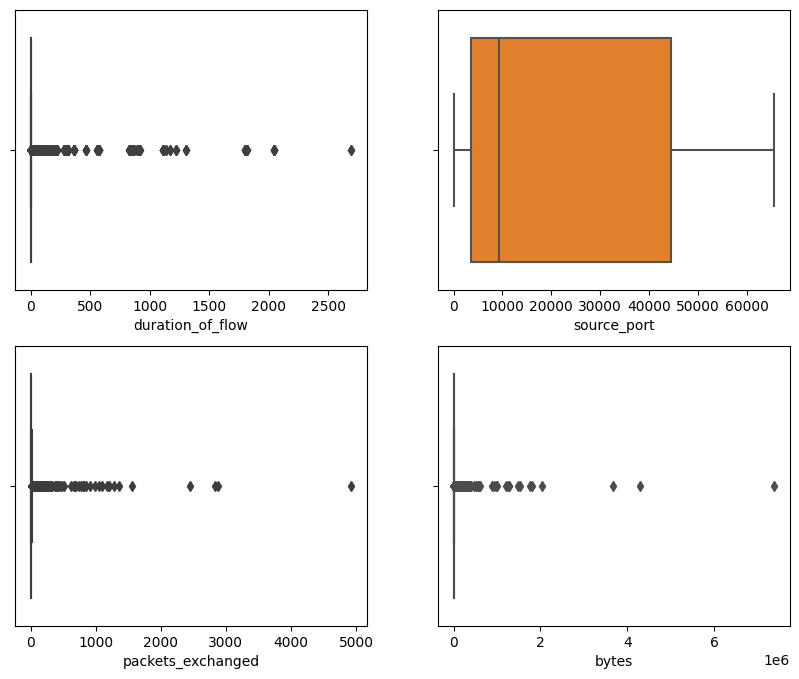

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,8))
axes = axes.flat

for index, column in enumerate(contcols):
    sns.boxplot(
        data=data,
        x=column,
        color=list(plt.rcParams['axes.prop_cycle']*2)[index]['color'],
        ax=axes[index]
    )



### Relationship between Categorical Features and Label

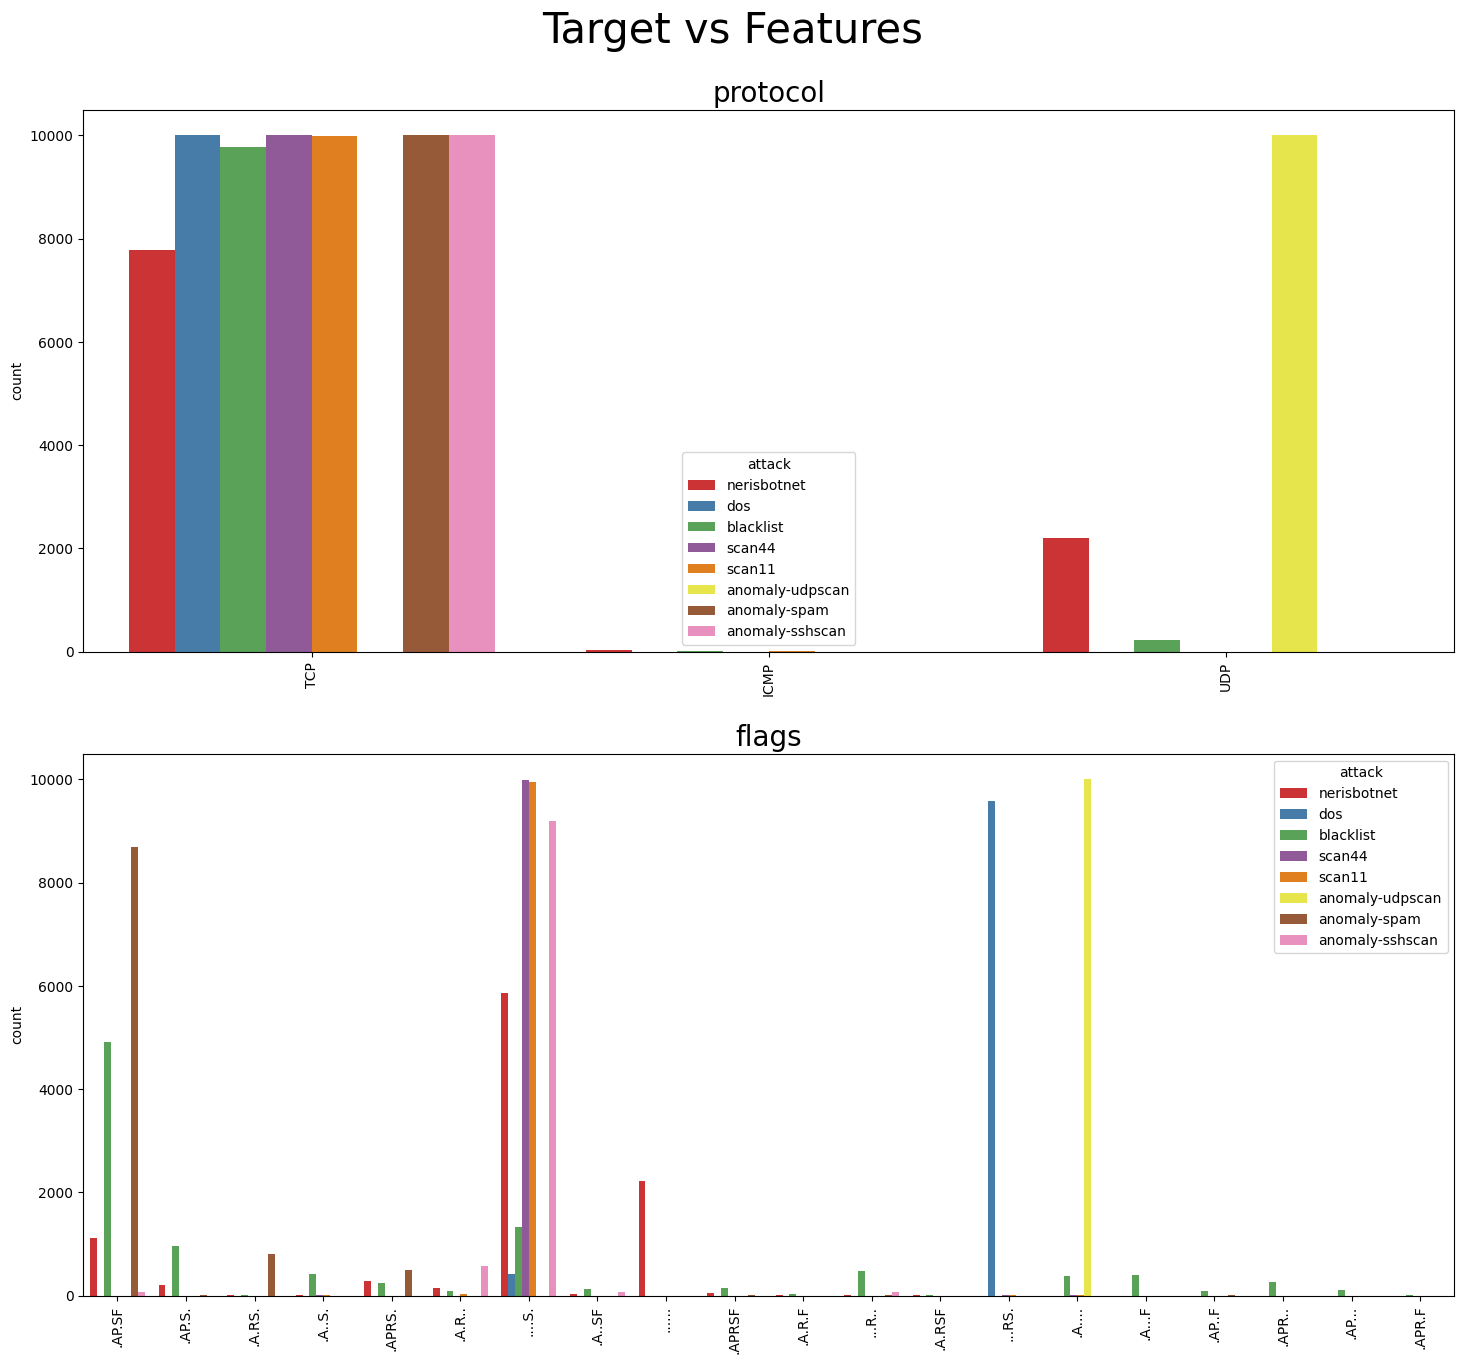

In [17]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 14))
axes = axes.flat
for index, column in enumerate(objcols):
    if column != 'attack':
        sns.countplot(
            data=data,
            x=column,
            hue=data['attack'],
            ax=axes[index],
            palette='Set1'
        )
        axes[index].set_xlabel('')
        axes[index].set_title(column, size=20)
        axes[index].tick_params(axis='x', rotation=90)

plt.suptitle('Target vs Features', size=30)
plt.tight_layout(pad=2)

# Feature Engineering

## Handling Missing Values

__There is no missing values present in this dataset.__

## Drop unwanted features

In [18]:
data.columns

Index(['duration_of_flow', 'source_port', 'destination_port', 'protocol',
       'flags', 'type_of_Service', 'packets_exchanged', 'bytes', 'attack',
       'source_IP_int', 'destination_IP_int'],
      dtype='object')

In [19]:
data.drop(columns={'flags'}, inplace=True)

## Handling Outliers

__We will handle outliers later.__

## Handling Categorical Features

In [20]:
objcols = data.select_dtypes(exclude=np.number).columns
objcols

Index(['protocol', 'attack'], dtype='object')

In [21]:
from sklearn.preprocessing import OrdinalEncoder

encode = OrdinalEncoder()
data[objcols] = encode.fit_transform(data[objcols])

## Feature Selection

In [22]:
data.columns

Index(['duration_of_flow', 'source_port', 'destination_port', 'protocol',
       'type_of_Service', 'packets_exchanged', 'bytes', 'attack',
       'source_IP_int', 'destination_IP_int'],
      dtype='object')

In [23]:
data = data.loc[:, ['duration_of_flow', 'source_IP_int', 'destination_IP_int', 'source_port', 'destination_port', 
             'protocol','type_of_Service', 'packets_exchanged', 'bytes', 'attack']]

In [24]:
data.corr().style.background_gradient(cmap='plasma')

,duration_of_flow,source_IP_int,destination_IP_int,source_port,destination_port,protocol,type_of_Service,packets_exchanged,bytes,attack
duration_of_flow,1.000000,-0.012469,0.088385,-0.048111,-0.015575,0.000099,-0.032936,0.021404,0.005798,0.030580
source_IP_int,-0.012469,1.000000,-0.268576,-0.540788,0.389531,0.650459,0.745830,0.031560,0.030598,-0.467192
destination_IP_int,0.088385,-0.268576,1.000000,0.029117,-0.223878,-0.104197,-0.260350,0.042725,-0.003657,-0.032648
source_port,-0.048111,-0.540788,0.029117,1.000000,-0.352077,-0.360766,-0.538283,-0.045062,-0.020348,0.327255
destination_port,-0.015575,0.389531,-0.223878,-0.352077,1.000000,-0.119839,0.717177,0.081969,0.042331,-0.344395
protocol,0.000099,0.650459,-0.104197,-0.360766,-0.119839,1.000000,0.270858,-0.042806,-0.008855,-0.178359
type_of_Service,-0.032936,0.745830,-0.260350,-0.538283,0.717177,0.270858,1.000000,0.061564,0.023527,-0.626236
packets_exchanged,0.021404,0.031560,0.042725,-0.045062,0.081969,-0.042806,0.061564,1.000000,0.867782,-0.048621
bytes,0.005798,0.030598,-0.003657,-0.020348,0.042331,-0.008855,0.023527,0.867782,1.000000,-0.008154
attack,0.030580,-0.467192,-0.032648,0.327255,-0.344395,-0.178359,-0.626236,-0.048621,-0.008154,1.000000


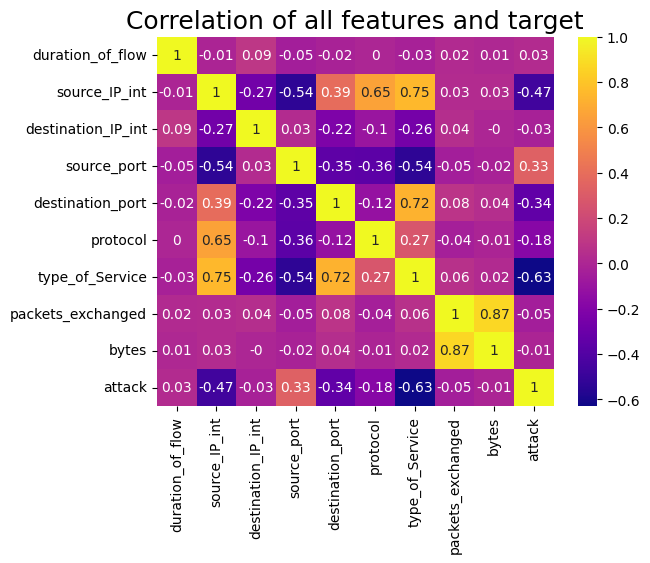

In [25]:
sns.heatmap(round(data.corr(),2), annot=True, cmap='plasma')
plt.title("Correlation of all features and target", fontsize= 18)
plt.show()

## Determine Features & Target Variables

In [26]:
# Splitting the dataset into target and features
X = data.drop('attack', axis=1)
y = pd.get_dummies(data['attack'])

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
print('xtrain shape: ', X_train.shape)
print('xtest shape: ', X_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ',y_test.shape)

xtrain shape:  (64000, 9)
xtest shape:  (16000, 9)
ytrain shape:  (64000, 8)
ytest shape:  (16000, 8)


There are different types of deep learning models that can be used for classification tasks, such as CNNs, RNNs, and Transformers. For this task, a simple feedforward neural network is used. Here are the steps to build a model:

    Define the input and output shape of the model.
    Define the number of layers and the number of neurons in each layer.
    Use the ReLU activation function for hidden layers and the sigmoid function for the output layer.
    Compile the model with an appropriate loss function, optimizer, and metrics.
    Train the model on the training dataset and validate it on the testing dataset.
    Plot the training and validation loss and accuracy graphs to understand the model's performance.

# Model Building

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
# nn model
model = Sequential()
# hidden layers
model.add(Dense(units=64, input_shape=(9,), activation='relu'))
model.add(Dense(units=32, activation='relu'))
# model.add(Dropout(0.2))

#output layer
model.add(Dense(units=8, activation='sigmoid'))
# back propagation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
#input and training
es = EarlyStopping(monitor='accuracy', mode='max', patience=20)
history = model.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test, y_test), callbacks=es)

Epoch 1/50
640/640 [==============================] - 1s 694us/step - loss: 0.1855 - accuracy: 0.7162 - val_loss: 0.0943 - val_accuracy: 0.8395
Epoch 2/50
640/640 [==============================] - 0s 598us/step - loss: 0.0809 - accuracy: 0.8645 - val_loss: 0.0695 - val_accuracy: 0.8945
Epoch 3/50
640/640 [==============================] - 0s 625us/step - loss: 0.0606 - accuracy: 0.9157 - val_loss: 0.0524 - val_accuracy: 0.9373
Epoch 4/50
640/640 [==============================] - 0s 600us/step - loss: 0.0488 - accuracy: 0.9282 - val_loss: 0.0446 - val_accuracy: 0.9430
Epoch 5/50
640/640 [==============================] - 0s 595us/step - loss: 0.0427 - accuracy: 0.9339 - val_loss: 0.0401 - val_accuracy: 0.9247
Epoch 6/50
640/640 [==============================] - 0s 599us/step - loss: 0.0390 - accuracy: 0.9390 - val_loss: 0.0371 - val_accuracy: 0.9311
Epoch 7/50
640/640 [==============================] - 0s 613us/step - loss: 0.0370 - accuracy: 0.9392 - val_loss: 0.0353 - val_accuracy:

### Loss and Accuracy Plot

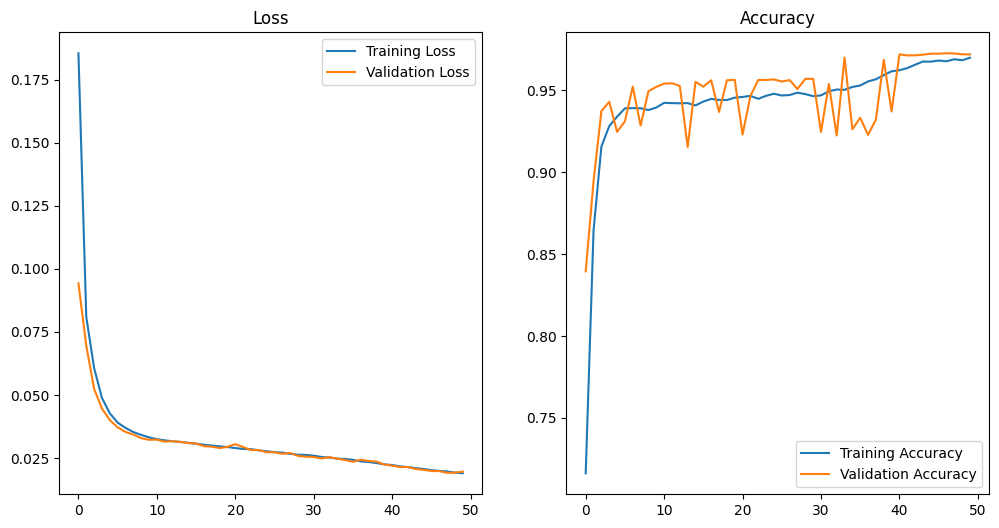

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

- The model seems to be performing well as the accuracy and validation accuracy are increasing after each epoch. 
- The loss and validation loss are also decreasing after each epoch which is a good sign. 
- The model seems to be overfitting a bit as the accuracy on the training set is higher than the validation set, but the difference is not very significant. 
- Overall, it seems that the model is learning well and is likely to make accurate predictions.